<a href="https://colab.research.google.com/github/hemien-me/ML-Learning-Path/blob/main/heartRate_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from scipy import stats
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Importing the dataset

In [49]:
dataset= pd.read_csv("Heart Prediction Quantum Dataset.csv")


In [50]:
print(dataset)

      Age  Gender  BloodPressure  Cholesterol  HeartRate  \
0    68.0    Male          105.0        191.0      107.0   
1    58.0  female           97.0        249.0       89.0   
2    44.0  female           93.0        190.0       82.0   
3    72.0    Male           93.0        183.0      101.0   
4    37.0  female          145.0        166.0      103.0   
5    50.0    Male          114.0        271.0       73.0   
6    68.0    Male          156.0        225.0       73.0   
7    48.0  female          156.0        236.0       61.0   
8    52.0  female          116.0          NaN      114.0   
9    40.0    Male          121.0        255.0       96.0   
10   40.0    Male          139.0        235.0       64.0   
11   53.0    Male          150.0        176.0       97.0   
12   65.0  female          140.0        206.0      104.0   
13   69.0    Male          108.0        180.0      100.0   
14   53.0    Male          110.0        283.0      113.0   
15   32.0    Male           94.0        

Check for Missing Values and Data Types

In [51]:
dataset.info()
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    498 non-null    float64
 1   Gender                 500 non-null    object 
 2   BloodPressure          499 non-null    float64
 3   Cholesterol            496 non-null    float64
 4   HeartRate              497 non-null    float64
 5   QuantumPatternFeature  497 non-null    float64
 6   HeartDisease           500 non-null    object 
dtypes: float64(5), object(2)
memory usage: 27.5+ KB


,0
Age,2
Gender,0
BloodPressure,1
Cholesterol,4
HeartRate,3
QuantumPatternFeature,3
HeartDisease,0


Handle Missing Values

In [52]:
numerical_cols = ['Age', 'BloodPressure', 'Cholesterol', 'HeartRate', 'QuantumPatternFeature']
imputer = SimpleImputer(strategy='mean')# same as df_filled_mean = dataset.fillna(dataset.mean(numeric_only=True))
dataset[numerical_cols] = imputer.fit_transform(dataset[numerical_cols])

In [53]:
pd.set_option('display.max_rows', None)   # Show all rows
pd.set_option('display.max_columns', None)

In [54]:
print(dataset[numerical_cols] )

           Age  BloodPressure  Cholesterol   HeartRate  QuantumPatternFeature
0    68.000000     105.000000   191.000000  107.000000               8.362241
1    58.000000      97.000000   249.000000   89.000000               9.249002
2    44.000000      93.000000   190.000000   82.000000               7.942542
3    72.000000      93.000000   183.000000  101.000000               6.495155
4    37.000000     145.000000   166.000000  103.000000               7.653900
5    50.000000     114.000000   271.000000   73.000000               8.314079
6    68.000000     156.000000   225.000000   73.000000               7.559545
7    48.000000     156.000000   236.000000   61.000000               9.152103
8    52.000000     116.000000   221.604839  114.000000               9.146932
9    40.000000     121.000000   255.000000   96.000000               9.683800
10   40.000000     139.000000   235.000000   64.000000               8.732313
11   53.000000     150.000000   176.000000   97.000000          

Encode Categorical Variables

In [55]:
gender = LabelEncoder()
dataset['Gender'] = gender.fit_transform(dataset['Gender'])

disease = LabelEncoder()
dataset['HeartDisease'] = disease.fit_transform(dataset['HeartDisease'])


In [57]:
print(dataset[['Gender', 'HeartDisease']])

     Gender  HeartDisease
0         0             1
1         1             0
2         1             1
3         0             1
4         1             1
5         0             0
6         0             1
7         1             0
8         1             0
9         0             0
10        0             0
11        0             0
12        1             1
13        0             1
14        0             0
15        0             0
16        1             1
17        0             1
18        0             0
19        1             0
20        0             1
21        0             1
22        1             1
23        0             0
24        1             0
25        1             0
26        0             0
27        0             1
28        0             0
29        0             1
30        1             1
31        0             1
32        1             1
33        0             0
34        0             1
35        0             0
36        1             1
37        0 

 Split features (X) and target (y)

In [58]:
X = dataset.drop('HeartDisease', axis=1)#X = Final.iloc[:, 0:-1]
y = dataset['HeartDisease']#y = Final.iloc[:, -1]

In [59]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

Create a new DataFrame for normalized features

In [60]:
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

Add the target column back

In [61]:
final_df = pd.concat([X_normalized_df, y], axis=1)

Save the normalized dataset

In [62]:
final_df.to_csv("Heart_Prediction_Normalized.csv", index=False)

In [63]:
print("✅ Normalized heart dataset saved successfully.")

✅ Normalized heart dataset saved successfully.


In [64]:
normalized_data = pd.read_csv("Heart_Prediction_Normalized.csv")

In [65]:
normalized_data.head()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,0.775510,0.0,0.168539,0.275168,0.796610,0.475640,1
1,0.571429,1.0,0.078652,0.664430,0.491525,0.667571,0
2,0.285714,1.0,0.033708,0.268456,0.372881,0.384800,1
3,0.857143,0.0,0.033708,0.221477,0.694915,0.071526,1
4,0.142857,1.0,0.617978,0.107383,0.728814,0.322326,1


Detect Outliers using Z-score

In [66]:
z_scores = np.abs(stats.zscore(X))
threshold = 3
outliers_z = (z_scores > threshold)
outlier_counts = outliers_z.sum(axis=0)
print("Z-score based outliers per feature:\n", pd.Series(outlier_counts, index=X.columns))

Z-score based outliers per feature:
 Age                      0
Gender                   0
BloodPressure            0
Cholesterol              0
HeartRate                0
QuantumPatternFeature    0
dtype: int64


Standardize Features

In [67]:
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [68]:
X_standardized

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature
0,0.920657,-1.066186,-1.055216,-7.021207e-01,1.046889e+00,5.248887e-02
1,0.221104,0.937923,-1.358683,6.284859e-01,8.588665e-03,1.018924e+00
2,-0.758271,0.937923,-1.510416,-7.250622e-01,-3.951947e-01,-4.049189e-01
3,1.200479,-1.066186,-1.510416,-8.856527e-01,7.007886e-01,-1.982351e+00
4,-1.247958,0.937923,0.462118,-1.275658e+00,8.161553e-01,-7.194948e-01
5,-0.338539,-1.066186,-0.713816,1.133199e+00,-9.143446e-01,-1.935959e-15
6,0.920657,-1.066186,0.879385,7.789007e-02,-9.143446e-01,-8.223279e-01
7,-0.478450,0.937923,0.879385,3.302465e-01,-1.606545e+00,9.133185e-01
8,-0.198628,0.937923,-0.637949,-6.520365e-16,1.450672e+00,9.076833e-01
9,-1.038092,-1.066186,-0.448282,7.661349e-01,4.123720e-01,1.492788e+00


Apply Log Transformation (only to positive values)

In [69]:
X_log_transformed = X_standardized.applymap(lambda x: np.log1p(x) if x > 0 else 0)

<ipython-input-69-bda6fa891d56>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_log_transformed = X_standardized.applymap(lambda x: np.log1p(x) if x > 0 else 0)


In [70]:
X_log_transformed

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature
0,0.652667,0.000000,0.000000,0.000000,0.716321,0.051158
1,0.199755,0.661617,0.000000,0.487651,0.008552,0.702564
2,0.000000,0.661617,0.000000,0.000000,0.000000,0.000000
3,0.788675,0.000000,0.000000,0.000000,0.531092,0.000000
4,0.000000,0.661617,0.379886,0.000000,0.596722,0.000000
5,0.000000,0.000000,0.000000,0.757623,0.000000,0.000000
6,0.652667,0.000000,0.630944,0.075005,0.000000,0.000000
7,0.000000,0.661617,0.630944,0.285364,0.000000,0.648839
8,0.000000,0.661617,0.000000,0.000000,0.896362,0.645890
9,0.000000,0.000000,0.000000,0.568793,0.345271,0.913402


Add Target Column Back & Save Clean CSV

In [71]:
final_df = pd.concat([X_log_transformed, y], axis=1)
final_df.to_csv("heart_ready.csv", index=False)

Detect Outliers using Z-score

In [72]:
z_scores = np.abs(stats.zscore(X_log_transformed))
threshold = 3
outliers_z = (z_scores > threshold)
outlier_counts = outliers_z.sum(axis=0)
print("Z-score based outliers per feature:\n", pd.Series(outlier_counts, index=X.columns))

Z-score based outliers per feature:
 Age                      0
Gender                   0
BloodPressure            0
Cholesterol              0
HeartRate                0
QuantumPatternFeature    0
dtype: int64


Load Clean Data

In [73]:
Final = pd.read_csv("heart_ready.csv")
Final.head()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,0.652667,0.000000,0.000000,0.000000,0.716321,0.051158,1
1,0.199755,0.661617,0.000000,0.487651,0.008552,0.702564,0
2,0.000000,0.661617,0.000000,0.000000,0.000000,0.000000,1
3,0.788675,0.000000,0.000000,0.000000,0.531092,0.000000,1
4,0.000000,0.661617,0.379886,0.000000,0.596722,0.000000,1


Check Class Distribution

In [74]:
print("Class distribution in target variable (HeartDisease):")
print(Counter(y))

Class distribution in target variable (HeartDisease):
Counter({1: 300, 0: 200})


Split Dataset

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)


Train Decision Tree Classifier

In [76]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)


Train Support Vector Machine (SVM)

In [77]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)


Evaluate Models

In [78]:
# Decision Tree results
print("Decision Tree Classification Report:\n")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

# SVM results
print("SVM Classification Report:\n")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))


Decision Tree Classification Report:

Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        40
           1       0.95      0.93      0.94        60

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

SVM Classification Report:

Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.88      0.95      0.92        40
           1       0.96      0.92      0.94        60

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



Visualize Confusion Matrices

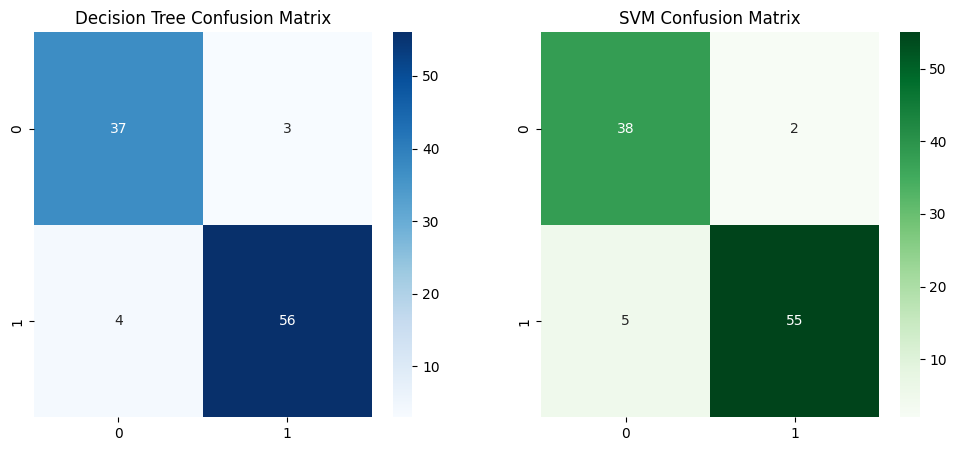

In [79]:
dt_cm = confusion_matrix(y_test, dt_preds)
svm_cm = confusion_matrix(y_test, svm_preds)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Greens")
plt.title("SVM Confusion Matrix")

plt.show()
